In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [60]:
df2=pd.read_csv('./data/online_shoppers_intention.csv')
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [95]:
# df2_use=df2[["BounceRates","ExitRates","PageValues","ProductRelated_Duration"]]
# df2_use.head()
df2_use=df2[["BounceRates","ExitRates","PageValues","ProductRelated_Duration",'Month','SpecialDay']]
df2_use.head()

,BounceRates,ExitRates,PageValues,ProductRelated_Duration,Month,SpecialDay
0,0.20,0.20,0.0,0.000000,Feb,0.0
1,0.00,0.10,0.0,64.000000,Feb,0.0
2,0.20,0.20,0.0,0.000000,Feb,0.0
3,0.05,0.14,0.0,2.666667,Feb,0.0
4,0.02,0.05,0.0,627.500000,Feb,0.0


In [96]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df2_use['Month'] = labelencoder.fit_transform(df2_use['Month'])

C:\Users\84160\AppData\Local\Temp\ipykernel_18368\3372927744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_use['Month'] = labelencoder.fit_transform(df2_use['Month'])


In [97]:
import random
random.seed(10)
df2_use_not0=df2_use.loc[df2_use['PageValues'] != 0.0]
df2_use_not0=df2_use_not0.sample(n=1000)
# df2_use_0=df2_use.loc[df2_use['PageValues'].astype(int)==0]
df2_use_0=df2_use.loc[df2_use['PageValues']==0]
df2_use_0=df2_use_0.sample(n=2000)

In [98]:
df2_use=df2_use_not0.merge(df2_use_0,how='outer')

In [51]:
# df2_use=df2_use.head(1000)

In [99]:
for i in range(len(df2_use['PageValues'])):
    if df2_use['PageValues'][i]>0:
        df2_use['PageValues'][i]=1
    else:
        df2_use['PageValues'][i]=0

C:\Users\84160\AppData\Local\Temp\ipykernel_18368\688001959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_use['PageValues'][i]=1
C:\Users\84160\AppData\Local\Temp\ipykernel_18368\688001959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_use['PageValues'][i]=0


In [100]:
df2_use['Month'].value_counts()

6    817
7    761
5    441
1    412
8    141
9    118
0    112
3    100
4     59
2     39
Name: Month, dtype: int64

In [101]:
df2_use['PageValues'].value_counts()

0.0    2000
1.0    1000
Name: PageValues, dtype: int64

In [102]:
# X=df2_use[["BounceRates","ExitRates","ProductRelated_Duration"]]
# y=df2_use['PageValues']
X= df2_use.drop('PageValues',axis=1)
y=df2_use['PageValues']

In [ ]:
#################################
######### Begin the SVM #########
#################################

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

SVM with linear kernel

In [104]:
# from sklearn.svm import SVC
# svclassifier = SVC(kernel='linear')
# svclassifier.fit(X_train, y_train)

from sklearn import svm
svclassifier = svm.SVC(C=1.0,kernel='linear',degree=3, gamma='auto')
svclassifier.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [105]:
y_pred = svclassifier.predict(X_test)

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[341  60]
 [ 98 101]]
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       401
         1.0       0.63      0.51      0.56       199

    accuracy                           0.74       600
   macro avg       0.70      0.68      0.69       600
weighted avg       0.73      0.74      0.73       600



In [108]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Recall score:',recall_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))

Accuracy score: 0.7366666666666667
Recall score: 0.507537688442211
precision_score: 0.6273291925465838


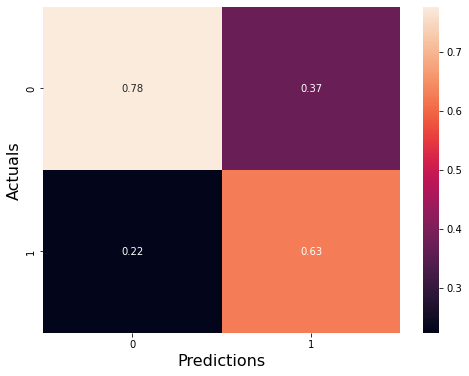

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
cmsvm=confusion_matrix(y_test,y_pred)
cmsvm=cmsvm.astype('float')/cmsvm.sum(axis=0)
plt.figure(figsize=(8,6))
ax=plt.subplot()
sns.heatmap(cmsvm,annot=True)
ax.set_xlabel('Predictions',fontsize=16)
ax.set_ylabel('Actuals',fontsize=16)
plt.show()

In [114]:
# cmsvm=confusion_matrix(y_test,y_pred)
# cmsvm.sum(axis=1)[:,np.newaxis]

array([[401],
       [199]], dtype=int64)

Try different kernel

kernel=sigmoid

In [129]:
from sklearn import svm
svclassifier = svm.SVC(C=1.0,kernel='sigmoid',degree=3, gamma='auto')
svclassifier.fit(X_train, y_train)

SVC(gamma='auto', kernel='sigmoid')

In [130]:
y_pred = svclassifier.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Recall score:',recall_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy score: 0.545
Recall score: 0.22110552763819097
precision_score: 0.2716049382716049
              precision    recall  f1-score   support

         0.0       0.65      0.71      0.67       401
         1.0       0.27      0.22      0.24       199

    accuracy                           0.55       600
   macro avg       0.46      0.46      0.46       600
weighted avg       0.52      0.55      0.53       600

[[283 118]
 [155  44]]


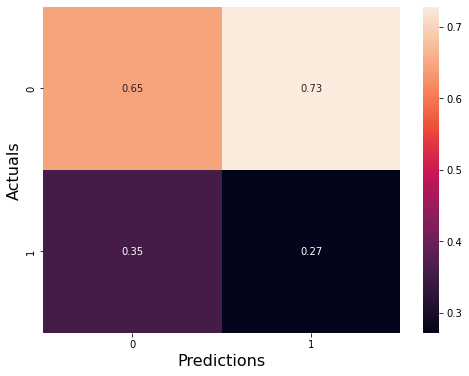

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
cmsvm=confusion_matrix(y_test,y_pred)
cmsvm=cmsvm.astype('float')/cmsvm.sum(axis=0)
plt.figure(figsize=(8,6))
ax=plt.subplot()
sns.heatmap(cmsvm,annot=True)
ax.set_xlabel('Predictions',fontsize=16)
ax.set_ylabel('Actuals',fontsize=16)
plt.show()

kernel='rbf'

In [133]:
from sklearn import svm
svclassifier = svm.SVC(C=1.0,kernel='rbf',degree=3, gamma='auto')
svclassifier.fit(X_train, y_train)

SVC(gamma='auto')

In [134]:
y_pred = svclassifier.predict(X_test)

In [135]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Recall score:',recall_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy score: 0.6416666666666667
Recall score: 0.1306532663316583
precision_score: 0.38235294117647056
              precision    recall  f1-score   support

         0.0       0.67      0.90      0.77       401
         1.0       0.38      0.13      0.19       199

    accuracy                           0.64       600
   macro avg       0.53      0.51      0.48       600
weighted avg       0.58      0.64      0.58       600

[[359  42]
 [173  26]]


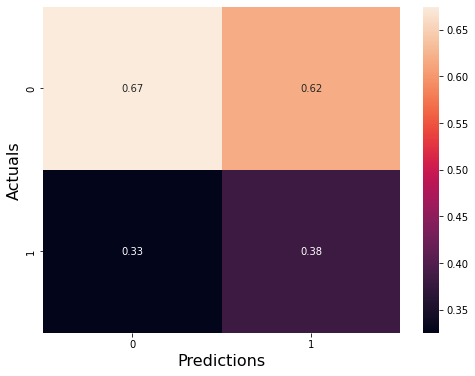

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
cmsvm=confusion_matrix(y_test,y_pred)
cmsvm=cmsvm.astype('float')/cmsvm.sum(axis=0)
plt.figure(figsize=(8,6))
ax=plt.subplot()
sns.heatmap(cmsvm,annot=True)
ax.set_xlabel('Predictions',fontsize=16)
ax.set_ylabel('Actuals',fontsize=16)
plt.show()

kernel= polynomial

In [11]:
# from sklearn import svm
# svclassifier = svm.SVC(C=1.0,kernel='poly',degree=3, gamma='auto')
# svclassifier.fit(X_train, y_train)

In [ ]:
# y_pred = svclassifier.predict(X_test)

In [ ]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# print('Accuracy score:',accuracy_score(y_test,y_pred))
# print('Recall score:',recall_score(y_test,y_pred))
# print('precision_score:',precision_score(y_test,y_pred))

Try linear kernel with different gamma parameters

Gamma= 0.7

In [44]:
from sklearn import svm
svclassifier = svm.SVC(C=1.0,kernel='linear',degree=3, gamma=0.7)
svclassifier.fit(X_train, y_train)

SVC(gamma=0.7, kernel='linear')

In [45]:
y_pred = svclassifier.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Recall score:',recall_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy score: 0.7333333333333333
Recall score: 0.6039603960396039
precision_score: 0.6039603960396039
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       398
         1.0       0.60      0.60      0.60       202

    accuracy                           0.73       600
   macro avg       0.70      0.70      0.70       600
weighted avg       0.73      0.73      0.73       600

[[318  80]
 [ 80 122]]


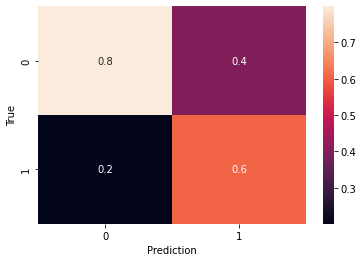

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
cmsvm=confusion_matrix(y_test,y_pred)
cmsvm=cmsvm.astype('float')/cmsvm.sum(axis=1)
ax=plt.subplot()
sns.heatmap(cmsvm,annot=True)
ax.set_xlabel('Prediction')
ax.set_ylabel('True')
plt.show()

Gamma=0.3

In [24]:
from sklearn import svm
svclassifier = svm.SVC(C=1.0,kernel='linear',degree=3, gamma=0.3)
svclassifier.fit(X_train, y_train)

SVC(gamma=0.3, kernel='linear')

In [25]:
y_pred = svclassifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Recall score:',recall_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy score: 0.7333333333333333
Recall score: 0.6039603960396039
precision_score: 0.6039603960396039
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       398
         1.0       0.60      0.60      0.60       202

    accuracy                           0.73       600
   macro avg       0.70      0.70      0.70       600
weighted avg       0.73      0.73      0.73       600



Text(33.0, 0.5, 'True')

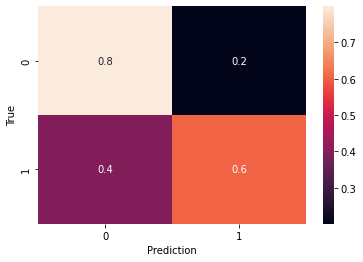

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
cmsvm=confusion_matrix(y_test,y_pred)
cmsvm=cmsvm.astype('float')/cmsvm.sum(axis=1)[:,np.newaxis]
ax=plt.subplot()
sns.heatmap(cmsvm,annot=True)
ax.set_xlabel('Prediction')
ax.set_ylabel('True')